In [162]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

np.set_printoptions(suppress=False)

### Step 1: Read in images pano1.jpg and pano2.jpg and show them
Leave them as color (three-channel) images.

Note that OpenCV reads images as BGR while Matplotlib wants RGB.

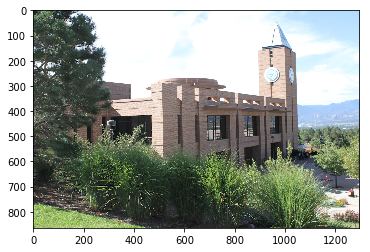

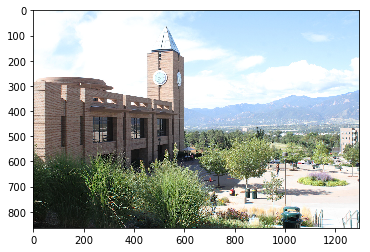

In [163]:
pano1 = cv2.cvtColor(cv2.imread('C:/Users/Ryan/Desktop/Fall2017/5840/Projects/Assignment2/pano1.jpg'), cv2.COLOR_BGR2RGB)
pano2 = cv2.cvtColor(cv2.imread('C:/Users/Ryan/Desktop/Fall2017/5840/Projects/Assignment2/pano2.jpg'), cv2.COLOR_BGR2RGB)

plt.imshow(pano1)
plt.show()

plt.imshow(pano2)
plt.show()

#### Coordinates for 2D points are given here.

In [164]:
x1 = np.array([512,997,1028,898],dtype='float32')
y1 = np.array([291,149,259,537],dtype='float32')

x2 = np.array([48,557,582,449],dtype='float32')
y2 = np.array([284,164,274,545],dtype='float32')

### Step 2: Show each image and plot the points on top as red dots.

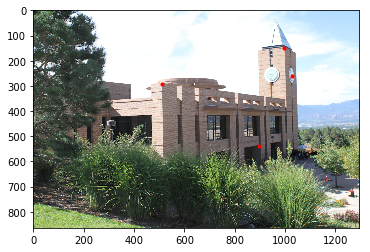

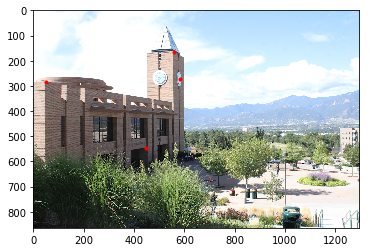

In [165]:
plt.imshow(pano1)
for i in range(0, 4):
    plt.plot(x1[i], y1[i], marker='o', markersize=3, color="red")
plt.show()

plt.imshow(pano2)
for i in range(0, 4):
    plt.plot(x2[i], y2[i], marker='o', markersize=3, color="red")
plt.show()

### Step 3: Use the Direct Linear Transform to solve for the 3x3 homography relating the two point sets.
See the accompanying PDF for information on this.

In [166]:
#h = np.array([[.756638323, -.000462358888, 466.168156], [-.0903489041, .890745767, 36.8833993], [-.000186879358, -.0000347420198, 1]], dtype='float32')
h = np.zeros((8, 9))
for i in range(0, 4):
    h[i * 2] = np.array([-x2[i], 0, x1[i] * x2[i], -y2[i], 0, x1[i] * y2[i], -1, 0, x1[i]])
    h[i * 2 + 1] = np.array([0, -x2[i], x2[i] * y1[i], 0, -y2[i], y1[i] * y2[i], 0, -1, y1[i]])
    
U, S, V = np.linalg.svd(h)
rows, columns = V.shape
V = V[rows - 1]
divideByValue = V[columns-1]

for i in range(0, columns):
    V[i] = V[i] / divideByValue
    
h = np.zeros((3, 3))
#for i in range(0, 3):
#    h[i] = [V[i], V[i + 3], V[i + 6]]
#    print(h[i])

for i in range(0, 3):
    h[i] = [V[i * 3], V[i * 3 + 1], V[i * 3 + 2]]
    print(h[i])
h = np.transpose(h)
print(h)

[  7.56638323e-01  -9.03489041e-02  -1.86879358e-04]
[ -4.62358888e-04   8.90745767e-01  -3.47420198e-05]
[ 466.1681557    36.88339935    1.        ]
[[  7.56638323e-01  -4.62358888e-04   4.66168156e+02]
 [ -9.03489041e-02   8.90745767e-01   3.68833993e+01]
 [ -1.86879358e-04  -3.47420198e-05   1.00000000e+00]]


### Step 4: Calculate the average re-projection error of the estimated homography.
See the accompanying PDF for information on this.

In [167]:
err = np.sqrt(np.square(x1[0] - (((h[0][0] * x2[0]) + (h[0][1] * y2[0]) + (h[0][2]))/((h[2][0] * x2[0]) + (h[2][1] * y2[0]) + (h[2][2])))) + np.square(y1[0] - (((h[1][0] * x2[0]) + (h[1][1] * y2[0]) + (h[1][2]))/((h[2][0] * x2[0]) + (h[2][1] * y2[0]) + (h[2][2])))))
print(err)

2.82769585406e-11


### Step 6: Warp image 2 using the homography and blend the result with image 1.
Use a linear blend with a weight of 0.5 for each image.

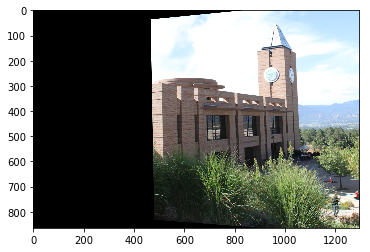

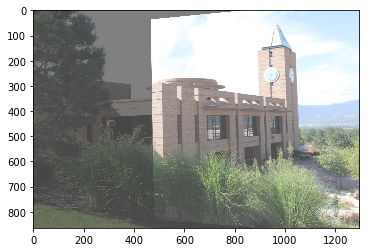

In [168]:
r, c, z = pano1.shape
pano2 = cv2.warpPerspective(pano2, h, (c, r))
plt.imshow(pano2)
plt.show()

plt.imshow(pano1, alpha=.5)
plt.imshow(pano2, alpha=.5)
plt.show()